In [1]:
# Block 1
#Importng dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('bmh')
style.use('ggplot')

In [2]:
# Block 2
df=pd.read_csv("^NSEI.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0
...,...,...,...,...,...,...,...
3386,2021-06-08,15773.900391,15778.799805,15680.000000,15740.099609,15740.099609,378200.0
3387,2021-06-09,15766.299805,15800.450195,15566.900391,15635.349609,15635.349609,457900.0
3388,2021-06-10,15692.099609,15751.250000,15648.500000,15737.750000,15737.750000,298300.0
3389,2021-06-11,15796.450195,15835.549805,15749.799805,15799.349609,15799.349609,363000.0


In [3]:
# Block 3
df=df[df!=0].dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume
1321,2013-01-21,6085.750000,6094.350098,6065.100098,6082.299805,6082.299805,130900.0
1322,2013-01-22,6080.149902,6101.299805,6040.500000,6048.500000,6048.500000,129000.0
1323,2013-01-23,6052.850098,6069.799805,6021.149902,6054.299805,6054.299805,137000.0
1324,2013-01-24,6046.200195,6065.299805,6007.850098,6019.350098,6019.350098,185200.0
1325,2013-01-25,6024.500000,6080.549805,6014.450195,6074.649902,6074.649902,147600.0
...,...,...,...,...,...,...,...
3386,2021-06-08,15773.900391,15778.799805,15680.000000,15740.099609,15740.099609,378200.0
3387,2021-06-09,15766.299805,15800.450195,15566.900391,15635.349609,15635.349609,457900.0
3388,2021-06-10,15692.099609,15751.250000,15648.500000,15737.750000,15737.750000,298300.0
3389,2021-06-11,15796.450195,15835.549805,15749.799805,15799.349609,15799.349609,363000.0


In [4]:
# Block 4
x=df[['High','Open','Low','Volume']].values
y=df['Close'].values

In [5]:
# Block 5
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [6]:
# Block 6
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [7]:
# Block 7
y_pred=regressor.predict(x_test)
result=pd.DataFrame({'Actual':y_test.flatten(),'predicted':y_pred.flatten()})
result.head(10)

,Actual,predicted
0,8126.899902,8128.968529
1,6089.049805,6078.748796
2,11010.200195,11015.097093
3,14834.849609,14845.937881
4,14736.400391,14659.994300
5,5851.200195,5854.658392
6,11737.900391,11747.522561
7,7731.799805,7763.421089
8,11284.299805,11273.626745
9,8821.700195,8831.260234


In [8]:
# Block 8
import math

<AxesSubplot:>

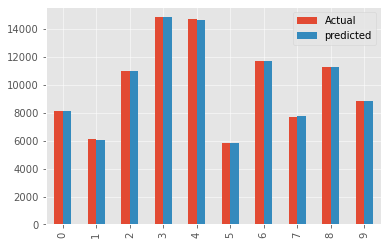

In [9]:
# Block 9
graph=result.head(10)
graph.plot(kind='bar')

In [10]:
# Block 10
df.shape

(2036, 7)

In [11]:
df['Close']

1321     6082.299805
1322     6048.500000
1323     6054.299805
1324     6019.350098
1325     6074.649902
            ...     
3386    15740.099609
3387    15635.349609
3388    15737.750000
3389    15799.349609
3390    15811.849609
Name: Close, Length: 2036, dtype: float64

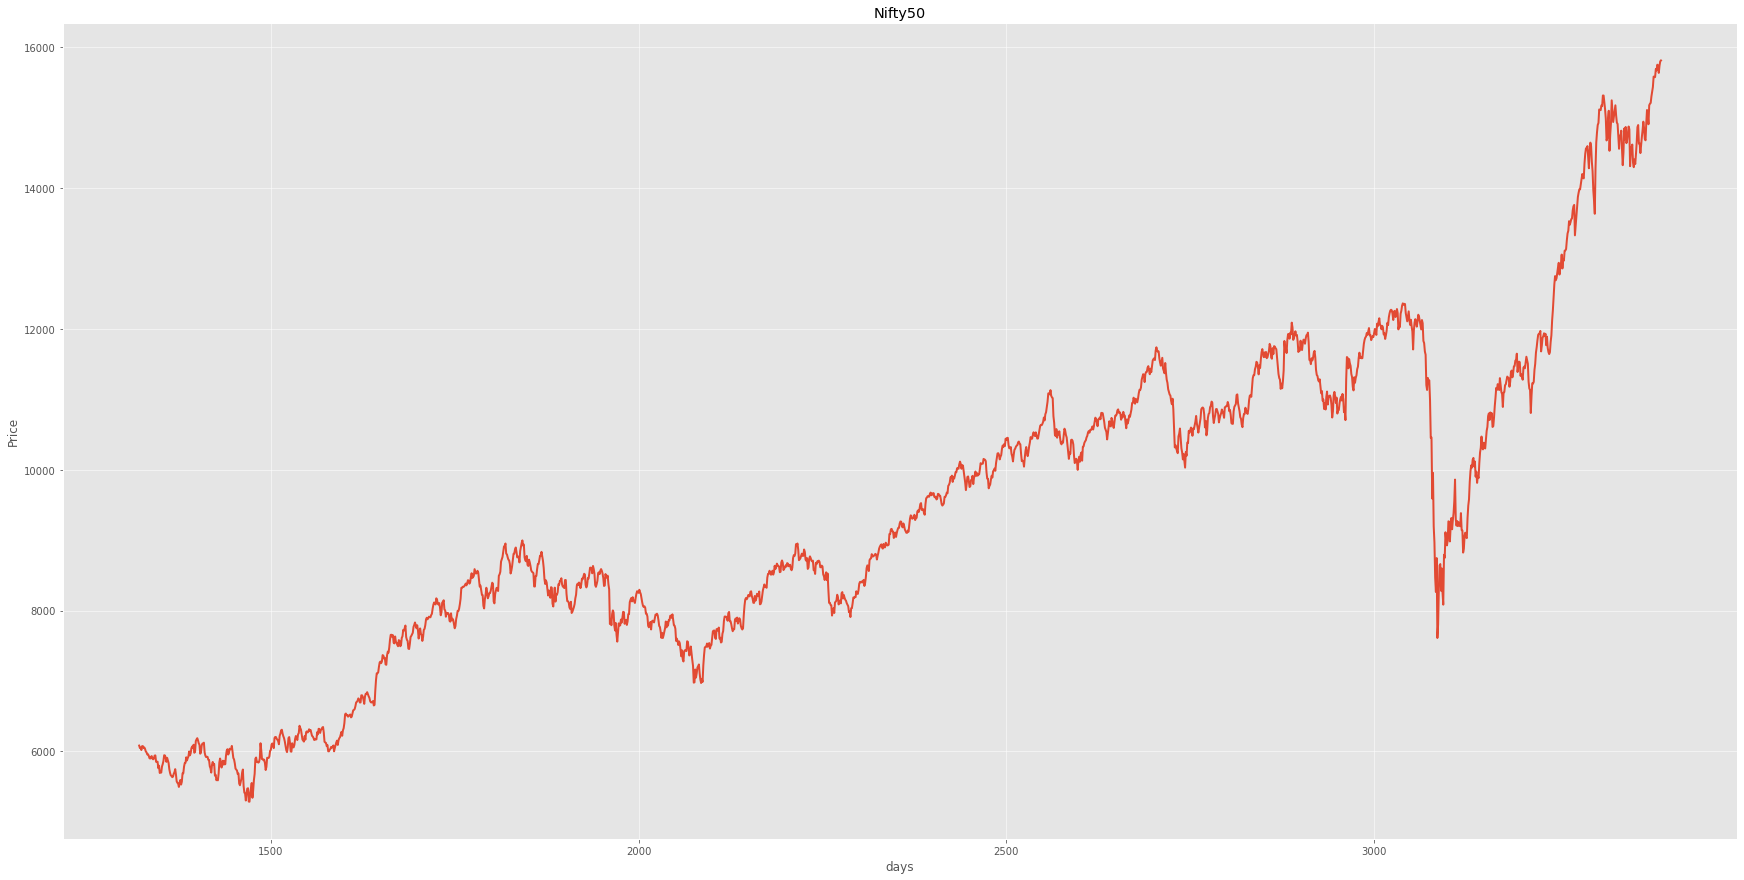

In [12]:
# Block 11
plt.figure(figsize=(30,15))
plt.title('Nifty50')
plt.xlabel('days')
plt.ylabel('Price')
plt.plot(df['Close'])
plt.show()

In [13]:
# Block 12
df=df[['Close']]
df

,Close
1321,6082.299805
1322,6048.500000
1323,6054.299805
1324,6019.350098
1325,6074.649902
...,...
3386,15740.099609
3387,15635.349609
3388,15737.750000
3389,15799.349609


In [14]:
# Block 13 adding 'Prediction' column to df 
f_d=500
df['Prediction']=df[['Close']].shift(-f_d)
df.head(4)

<ipython-input-14-293b34e0275a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction']=df[['Close']].shift(-f_d)


,Close,Prediction
1321,6082.299805,8565.549805
1322,6048.500000,8627.400391
1323,6054.299805,8711.549805
1324,6019.350098,8805.500000


In [15]:
# Block 14 - Assigned original CLOSING VALUE to variable "x"
x=np.array(df.drop(['Prediction'],1))[:-f_d]
print(x)

[[ 6082.299805]
 [ 6048.5     ]
 [ 6054.299805]
 ...
 [11737.900391]
 [11657.049805]
 [11844.099609]]


In [16]:
# Block 15 - Assigned PREDICTED VALUE to variable "y"
y=np.array(df['Prediction'])[:-f_d]
print(y)

[ 8565.549805  8627.400391  8711.549805 ... 15737.75     15799.349609
 15811.849609]


In [17]:
# Block 16
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [18]:
# Block 17

x_future=df.drop(['Prediction'],1)[:-f_d] # assigning CLOSING values to variable "x_future"
x_future=x_future.tail(f_d) # Assigning the last 500 CLOSING values to "x_future"
x_future=np.array(x_future) # converting to array
x_future

array([[ 9217.950195],
       [ 9306.599609],
       [ 9351.849609],
       [ 9342.150391],
       [ 9304.049805],
       [ 9313.799805],
       [ 9311.950195],
       [ 9359.900391],
       [ 9285.299805],
       [ 9314.049805],
       [ 9316.849609],
       [ 9407.299805],
       [ 9422.400391],
       [ 9400.900391],
       [ 9445.400391],
       [ 9512.25    ],
       [ 9525.75    ],
       [ 9429.450195],
       [ 9427.900391],
       [ 9438.25    ],
       [ 9386.150391],
       [ 9360.549805],
       [ 9509.75    ],
       [ 9595.099609],
       [ 9604.900391],
       [ 9624.549805],
       [ 9621.25    ],
       [ 9616.099609],
       [ 9653.5     ],
       [ 9675.099609],
       [ 9637.150391],
       [ 9663.900391],
       [ 9647.25    ],
       [ 9668.25    ],
       [ 9616.400391],
       [ 9606.900391],
       [ 9618.150391],
       [ 9578.049805],
       [ 9588.049805],
       [ 9657.549805],
       [ 9653.5     ],
       [ 9633.599609],
       [ 9630.      ],
       [ 95

In [19]:
# Block 18
linreg=LinearRegression().fit(x_train,y_train)
linreg_prediction=linreg.predict(x_future)  # making the model --- we are storing predicted closing values into "linreg-prediction"
print(linreg_prediction)

[10877.11294621 10955.97302191 10996.22617492 10987.59801787
 10953.70478654 10962.37811785 10960.73275577 11003.38792872
 10937.02530325 10962.60051096 10965.09113944 11045.55314119
 11058.98620636 11039.86039885 11079.44637252 11138.91394246
 11150.92317043 11065.25751772 11063.87885479 11073.08558174
 11026.73920533 11003.96562952 11136.69001135 11212.61467147
 11221.33317704 11238.81275424 11235.87733865 11231.29569275
 11264.56604991 11283.78046684 11250.0218883  11273.81795113
 11259.00622215 11277.68724343 11231.56326013 11223.11232193
 11233.1200119  11197.44763568 11206.3433601  11268.16864483
 11264.56604991 11246.86321049 11243.66109752 11194.69030805
 11138.1581537  11120.23292117 11131.66357923 11146.60909191
 11230.31751089 11228.80506427 11250.42150026 11283.29137635
 11275.50761748 11369.13511701 11382.47870365 11409.21018118
 11476.46237909 11471.70264524 11498.03451081 11419.04065231
 11483.48948009 11460.09389922 11497.41163664 11542.91361487
 11541.26738457 11591.17

In [20]:
df.head()

,Close,Prediction
1321,6082.299805,8565.549805
1322,6048.500000,8627.400391
1323,6054.299805,8711.549805
1324,6019.350098,8805.500000
1325,6074.649902,8809.349609


<ipython-input-21-36baa8360a47>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction']=predictions


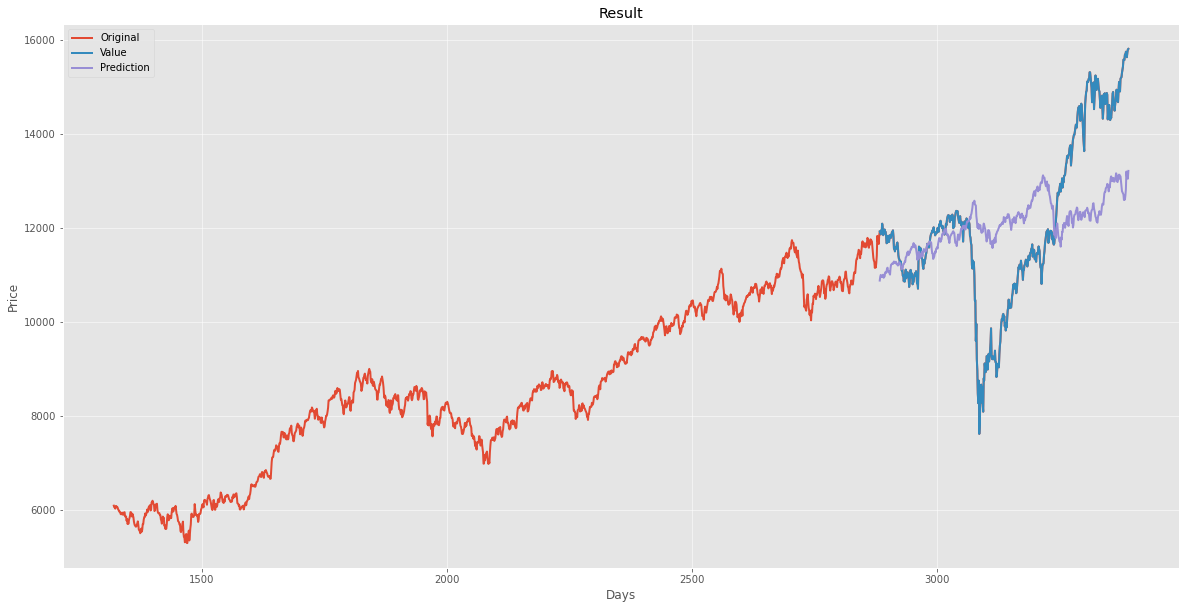

In [21]:
# Block 19
 # assinging Close and Prediction values to "valid"
predictions=linreg_prediction
valid=df[x.shape[0]:]
valid['Prediction']=predictions
plt.figure(figsize=(20,10))
plt.title('Result')
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(df['Close']) # original
plt.plot(valid[['Close','Prediction']])
plt.legend(['Original','Value','Prediction'])
plt.show()

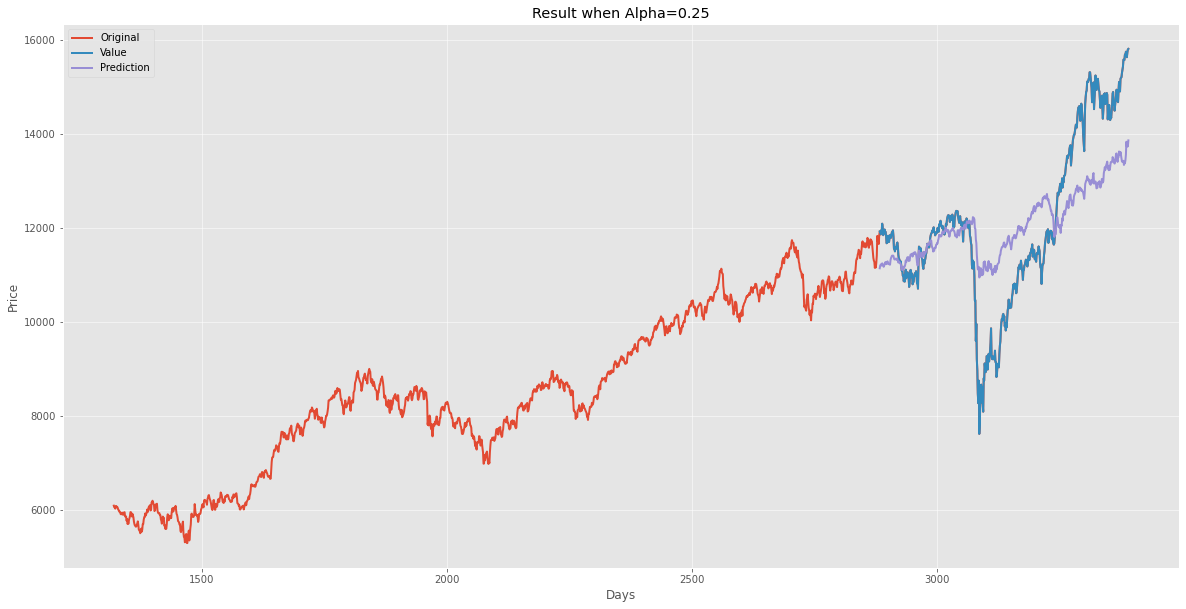

In [22]:
# keeping alpha=0.25 and predicting
alpha=0.25
T_of_n_plus_one_25=(np.array(valid['Close'])*alpha)+(np.array(valid['Prediction'])*(1-alpha))
valid_new_25=pd.DataFrame({'Close':valid['Close'],'Prediction':T_of_n_plus_one_25.flatten()})

plt.figure(figsize=(20,10))
plt.title('Result when Alpha=0.25')
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(df['Close']) # original
plt.plot(valid_new_25[['Close','Prediction']])
plt.legend(['Original','Value','Prediction'])
plt.show()

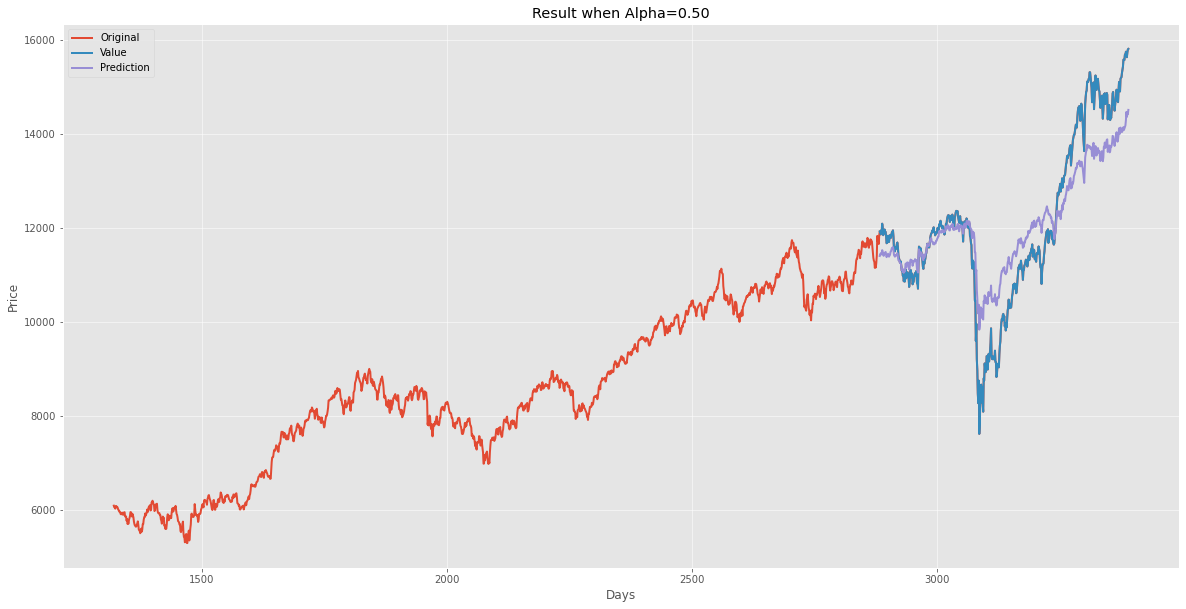

In [23]:
# keeping alpha=0.5 and predicting
alpha=0.50
T_of_n_plus_one_50=(np.array(valid['Close'])*alpha)+(np.array(valid['Prediction'])*(1-alpha))
valid_new_50=pd.DataFrame({'Close':valid['Close'],'Prediction':T_of_n_plus_one_50.flatten()})

plt.figure(figsize=(20,10))
plt.title('Result when Alpha=0.50')
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(df['Close']) # original
plt.plot(valid_new_50[['Close','Prediction']])
plt.legend(['Original','Value','Prediction'])
plt.show()

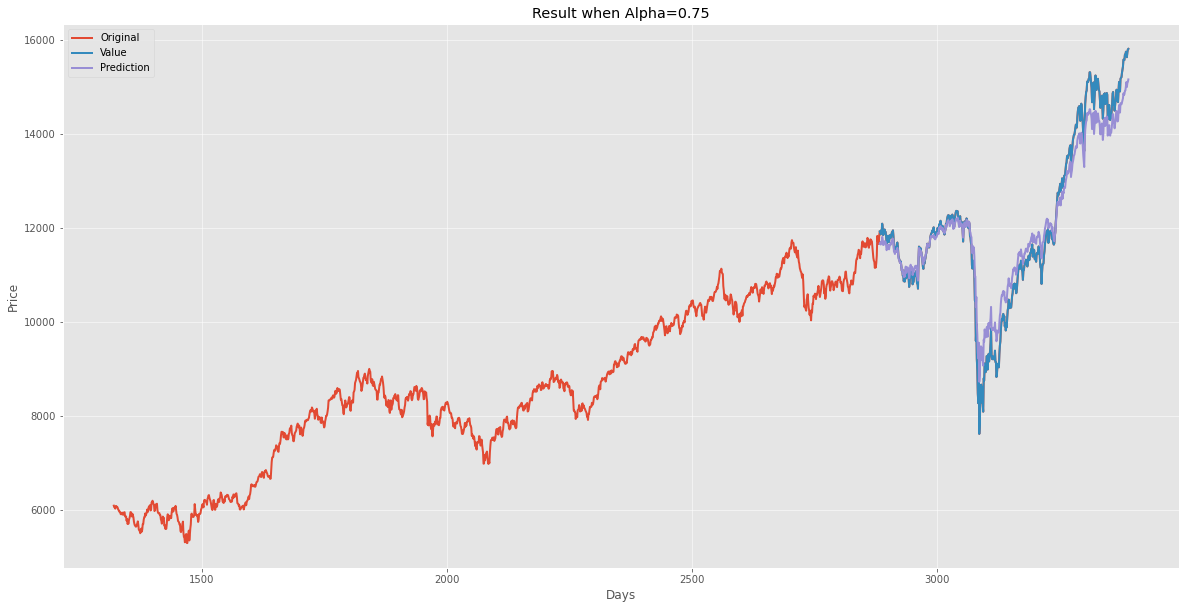

In [24]:
# keeping alpha=0.75 and predicting
alpha=0.75
T_of_n_plus_one_75=(np.array(valid['Close'])*alpha)+(np.array(valid['Prediction'])*(1-alpha))
valid_new_75=pd.DataFrame({'Close':valid['Close'],'Prediction':T_of_n_plus_one_75.flatten()})

plt.figure(figsize=(20,10))
plt.title('Result when Alpha=0.75')
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(df['Close']) # original
plt.plot(valid_new_75[['Close','Prediction']])
plt.legend(['Original','Value','Prediction'])
plt.show()